Start Testing!
test accuracy：89.770%
Normalized confusion matrix
[[0.821 0.018 0.024 0.006 0.005 0.001 0.011 0.002 0.087 0.025]
 [0.002 0.972 0.001 0.    0.    0.    0.    0.    0.007 0.018]
 [0.009 0.001 0.894 0.01  0.02  0.008 0.039 0.009 0.008 0.002]
 [0.007 0.003 0.056 0.787 0.018 0.068 0.034 0.005 0.016 0.006]
 [0.005 0.001 0.031 0.015 0.895 0.008 0.023 0.016 0.003 0.003]
 [0.004 0.003 0.037 0.07  0.022 0.826 0.017 0.014 0.007 0.   ]
 [0.001 0.001 0.019 0.005 0.007 0.003 0.957 0.001 0.006 0.   ]
 [0.003 0.002 0.023 0.022 0.011 0.014 0.002 0.91  0.008 0.005]
 [0.006 0.009 0.006 0.001 0.    0.    0.    0.    0.966 0.012]
 [0.002 0.028 0.003 0.001 0.    0.001 0.    0.    0.016 0.949]]
             precision    recall  f1-score   support

      plane       0.95      0.82      0.88      1000
        car       0.94      0.97      0.95      1000
       bird       0.82      0.89      0.85      1000
        cat       0.86      0.79      0.82      1000
       deer       0.92      0.90      

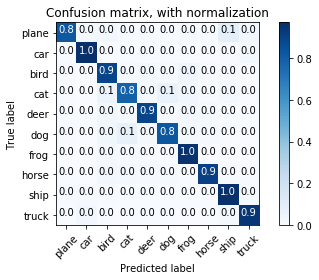

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from Resnet import ResNet18
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools

# choose your device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

PATH = './model/net_075.pth'

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# load model
net = ResNet18().to(device)
net.load_state_dict(torch.load(PATH))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_normalized.jpg')
    
if __name__ == "__main__":
    print("Start Testing!")
    label_true = []
    label_predict = []
    with torch.no_grad():
        correct = 0
        total = 0
        for data in testloader:
            net.eval()
            images, labels = data
            label_true.extend(list(labels.cpu().numpy()))
            images, labels = images.to(device), labels.to(device)
            # print(labels)
            outputs = net(images)
            # find the classification
            _, predicted = torch.max(outputs.data, 1)
            label_predict.extend(list(predicted.cpu().numpy()))
            # print(predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum()
        print('test accuracy：%.3f%%' % (100 * correct.float() / total))
        matrix = metrics.confusion_matrix(label_true,label_predict)
    plt.figure()
    plot_confusion_matrix(matrix, classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'),normalize=True,
                      title='Confusion matrix, with normalization')
    print(metrics.classification_report(label_true,label_predict,target_names=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')))

